In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
df=pd.read_csv("C:/Users/kukup/Downloads/Steam.csv")

1) Провести предобработку данных (пропуски, дубликаты и т.д.) 

In [3]:
df.drop_duplicates(inplace=True)
display(df.head(10))
print(df.isnull().sum())#пропусков практически нет, 14 в publisher и 1 в developer, заменим на Unknown
df.developer.fillna("Unknown",inplace=True)
df.publisher.fillna("Unknown",inplace=True)
print(df.isnull().sum())#проверка, что всё заменили
display(df.describe())#можно приступать к первичному анализу

,appid,name,release_date,english,developer,publisher,platforms,required_age,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Action,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Action,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Action,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Action,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Action,0,5250,288,624,415,5000000-10000000,3.99
5,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Action,0,2758,684,175,10,5000000-10000000,3.99
6,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Action,0,27755,1100,1300,83,5000000-10000000,7.19
7,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Action,0,12120,1439,427,43,10000000-20000000,7.19
8,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Action,0,3822,420,361,205,5000000-10000000,3.99
9,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Action,33,67902,2419,691,402,10000000-20000000,7.19


appid                0
name                 0
release_date         0
english              0
developer            1
publisher           14
platforms            0
required_age         0
genres               0
achievements         0
positive_ratings     0
negative_ratings     0
average_playtime     0
median_playtime      0
owners               0
price                0
dtype: int64
appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
genres              0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64


,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


Результаты первичного анализа:  
Данные а датафрейме приведены с 1997-06-30 по 2019-05-01  
Большинство игр(98%) на имеют английский язык  
Средняя цена игры - 6.07, максимальная - 421, минимальная - 0

2) Рассчитайте среднюю стоимость игр в Steam 

In [227]:
print(f"Средняя цена игр в Steam: {df.price.mean()}")

Средняя цена игр в Steam: 6.078193167128348


Результат первичного анализа подтвердился

3) Постройте диаграмму, которая иллюстрирует, какое количество игр поддерживает английский язык, а какое — нет 

english
1    26564
0      511
Name: count, dtype: int64


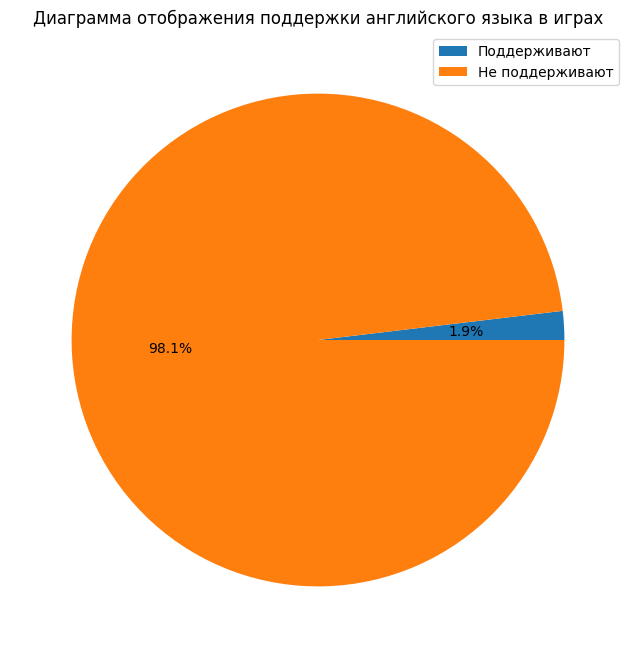

In [4]:
fig, ax = plt.subplots(figsize=(8,8))#создаём фигуру и ось
print(df.english.value_counts())#думаю, отсюда можно вытащить поддержку/не поддержку английского
ax.pie([df.english.value_counts()[0],df.english.value_counts()[1]],autopct='%1.1f%%')#строим круговую диаграмму
ax.set_title("Диаграмма отображения поддержки английского языка в играх")
ax.legend(["Поддерживают","Не поддерживают"])
fig.show(warn=False)

Вывод: результаты первичного анализа всё так же верны:  
98,1% поддерживают английский, 1.9% - нет  
Таким образом, абсолютное большинство разработчиков работает, в первую очередь, на англоговорящую аудиторию


4) Постройте диаграмму, которая иллюстрирует, какое количество игр является бесплатными, а какое требуется покупать 

2560
24515


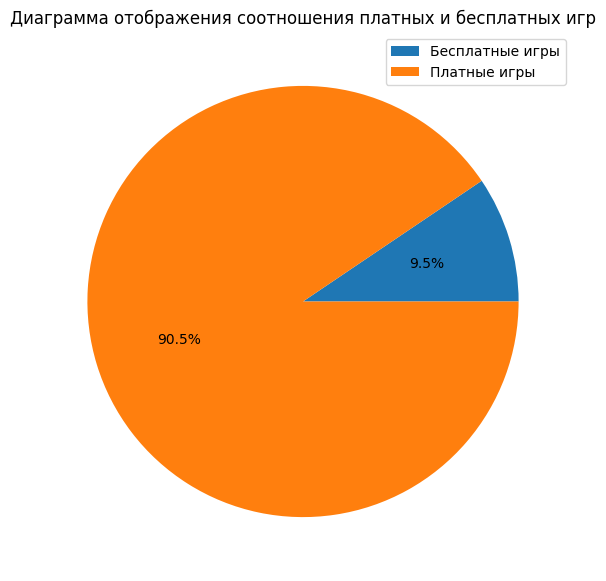

In [5]:
len_0=len(df[df["price"]==0])# строки, где цена игры = 0
len_1=len(df[df["price"]>0])#цена больше 0
print(len_0)
print(len_1)
fig,ax=plt.subplots(figsize=(7,7))
ax.pie([len_0,len_1],autopct='%1.1f%%')#построение аналогично предыдущему пункту
ax.set_title("Диаграмма отображения соотношения платных и бесплатных игр")
ax.legend(["Бесплатные игры", "Платные игры"])
fig.show(warn=False)

Вывод:  
90,5% игр на рынке являются платными. Следовательно, большинство издателей предпочитают изначально платную основу распространения, а не free-to-play.
На бесплатную основу распространения приходится лишь 9,5% рынка

5) Постройте сводную таблицу с количеством выпущенных игр за каждый год (постройте для неё гистограмму) 

In [6]:
df["release_date"]=pd.to_datetime(df["release_date"])#форматируем тип столбца для облегчения дальнейшей работы
df["year"]=df.release_date.dt.year#формируем новый столбец - год выпуска
pivot=df.groupby(by=["year"])["appid"].agg("count")
display(pivot)#итоговая сводная таблица

year
1997       1
1998       1
1999       2
2000       2
2001       4
2002       1
2003       3
2004       6
2005       6
2006      48
2007      93
2008     145
2009     305
2010     238
2011     239
2012     320
2013     418
2014    1555
2015    2597
2016    4361
2017    6357
2018    8160
2019    2213
Name: appid, dtype: int64

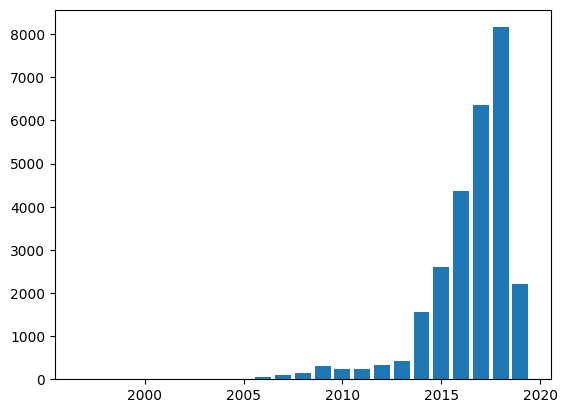

In [7]:
fig,ax = plt.subplots()
#ax.hist(pivot, bins=2) строил гистограмму по заданию, получился крайне неинформативный график, решил строить обычную столбчатую диаграмму
ax.bar(pivot.index,list(pivot))
fig.show(warn=False)

Вывод:  
Видим, что за период 1997-2013 площадка практически не пользовалась спросом  
2014-2018 характеризуется подъёмом выпуска игр на площадке, данные 2019 года можно считать некорректными, т.к имеем данные только первой половины года

6) Найдите и постройте диаграмму для топ 10 разработчиков видеоигр и отдельно для топ 10 издателей видеоигр, начиная с 2017 года (включительно) 

In [239]:
display(df.loc[df["year"]>=17,"developer"].value_counts().head(10))
display(df.developer.value_counts().head(10))

developer
Choice of Games               94
KOEI TECMO GAMES CO., LTD.    72
Ripknot Systems               62
Laush Dmitriy Sergeevich      51
Nikita "Ghost_RUS"            50
Dexion Games                  45
RewindApp                     43
Hosted Games                  42
Blender Games                 40
For Kids                      36
Name: count, dtype: int64

developer
Choice of Games               94
KOEI TECMO GAMES CO., LTD.    72
Ripknot Systems               62
Laush Dmitriy Sergeevich      51
Nikita "Ghost_RUS"            50
Dexion Games                  45
RewindApp                     43
Hosted Games                  42
Blender Games                 40
For Kids                      36
Name: count, dtype: int64

Вывод:  
По списку можем заметить, что в топе разработчиков есть не только крупные студии, но и разработчики-одиночки/небольшие команды  
Также можно заметить, на удивление, что топ разработчиков за период с 2017 и за период с 1997 не отличаются

In [240]:
display(df.loc[df["year"]>=17,"publisher"].value_counts().head(10))

publisher
Big Fish Games         212
Strategy First         136
Ubisoft                111
THQ Nordic              98
Square Enix             97
Sekai Project           96
Choice of Games         94
1C Entertainment        88
Dagestan Technology     88
SEGA                    78
Name: count, dtype: int64

Вывод:  
С огромным отрывом от остальных идёт Big Fish Games, остальные издатели отличаются друг от друга незначительно

7) Необходимо вывести топ 6 игр по количеству пользователей (owners) 


In [225]:
listy0=[]
listy1=[]
for str in df.owners:#в цикле проходим по каждой строке столбца owner, сплитуем строку по -, формируем два списка - по минимуму пользователей и по максимуму
    str=str.split("-")
    listy0.append(int(str[0]))
    listy1.append(int(str[1]))
df["owners_down"]=listy0
df["owners_up"]=listy1
display(df.sort_values(by="owners_up", ascending=False).head(6)[["name","owners_up"]])

,name,owners_up
22,Dota 2,200000000
25,Counter-Strike: Global Offensive,100000000
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,100000000
19,Team Fortress 2,50000000
3362,Unturned,50000000
1634,Warframe,50000000


Вывод:  
Отличается от остальных огромным числом пользователей Dota 2, за ней располагаются Counter-Strike: Global Offensive и PLAYERUNKNOWN'S BATTLEGROUNDS с одинаковым верхним значением в 100000000, далее идут Team Fortress 2, Team Fortress 2 и Warframe с 50000000 пользователями.

Вывод по работе:  
1) Абсолютное большинство игр поддерживают английский и имеют платную модель распространения. Можно учитывать при планировании маркетинга игры.
2) Средняя цена - 6 условных единиц (баксов, вероятно, однако точно не указано). Также можно учитывать при расчитывании стоимости игры как среднее значение по рынку.
3) Выявили топ издателей и разработчиков. Может пригодиться при поиске команды разработчиков и проверенного издателя соответсвенно
4) Dota 2 обгоняет любую другую игру по пользователям минимум в 2 раза. Можно иследовать концепцию игры и использовать её как базис для разработки собственной. 